<center> 
    <h1> PACKAGE / DATA IMPORTS</h1> 
</center>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm # with this i can do a quick linear regression
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

import random
import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

#importing all packages i plan to use

In [2]:
df = pd.read_csv('./data/train.csv')
df_2 = pd.read_csv('./data/test.csv')

#reading in my training and test data 

<center> 
    <h1> DATA CLEANING </h1> 
</center>

In [3]:
df.head()

#displaying the first 5 rows of my training data

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df.tail()

#displaying the last  5 rows of my training data

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000
2050,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,189000


In [5]:
df.shape

#displaying the shape of my training data

(2051, 81)

In [6]:
df.describe()

#getting info on my training data such as shape, data types of each column, and whether or not null values exist

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
def clean_columns(col):
    return col.lower().replace(' ', '_').replace('/', '_')

#built a function to clean my columns by:
#1) making them lowercase and 2) replacing spaces and forward slashes with underscores

In [8]:
df.columns = [clean_columns(col) for col in df.columns]
df.head(1)

#passed my function in a list comprehension to do it all with one line of code rather than many
#displayed my head to confirm my desired results were achieved

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [9]:
df_2.columns = [clean_columns(col) for col in df_2.columns]
df_2.head(1)

#passed my function in a list comprehension to do it all with one line of code rather than many
#displayed my head to confirm my desired results were achieved

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD


In [10]:
df[df.columns[df.isnull().any()]].isnull().sum()

#displaying only the columns with nulls and their sum

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

In [11]:
df_2[df_2.columns[df_2.isnull().any()]].isnull().sum()

#displaying only the columns with nulls and their sum

lot_frontage      160
alley             821
mas_vnr_type        1
mas_vnr_area        1
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
electrical          1
fireplace_qu      422
garage_type        44
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
pool_qc           875
fence             707
misc_feature      838
dtype: int64

In [12]:
df.columns[df.isnull().any()]

#displaying a list of columns that have null values

Index(['lot_frontage', 'alley', 'mas_vnr_type', 'mas_vnr_area', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'bsmt_full_bath', 'bsmt_half_bath', 'fireplace_qu', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area',
       'garage_qual', 'garage_cond', 'pool_qc', 'fence', 'misc_feature'],
      dtype='object')

In [13]:
def fill_na_with_mean_or_mode(col):
    if col.dtype == int or col.dtype == float:
        return col.fillna(round(col.mean()), inplace=True)
    else:
        return col.fillna(col.mode()[0], inplace=True)
    
#created a function to fill numeric and nonnumeric nulls with either their mean or mode.

In [14]:
[fill_na_with_mean_or_mode(df[col]) for col in ['lot_frontage', 'mas_vnr_area','garage_cars', 'garage_area']];

#passed my function through a list comprehension so i could fill all null columns with one line of code

In [15]:
[fill_na_with_mean_or_mode(df_2[col]) for col in ['lot_frontage', 'mas_vnr_area', 'electrical']];

#passed my function through a list comprehension so i could fill all null columns with one line of code

In [16]:
def make_string_na(col):
        return col.fillna('NA', inplace=True)
    
#created a function to fill np.NaNs with string 'NA' for cases where 'NA' means No (some thing)

In [17]:
[make_string_na(df[col]) for col in ['alley', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'pool_qc', 'fence', 'misc_feature', 'mas_vnr_type']];

#passed my function through a list comprehension so i could fill all columns with np.NaNs with one line of code

In [18]:
[make_string_na(df_2[col]) for col in ['alley', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'pool_qc', 'fence', 'misc_feature', 'mas_vnr_type']];

#passed my function through a list comprehension so i could fill all columns with np.NaNs with one line of code

In [19]:
[df[col].fillna(0, inplace=True) for col in ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath']];

#created a list comprehension to fill np.NaNs with 0

In [20]:
[df_2[col].fillna(0, inplace=True) for col in ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath']];

#created a list comprehension to fill np.NaNs with 0

In [21]:
df.garage_yr_blt.fillna(df.year_built, inplace=True)
df_2.garage_yr_blt.fillna(df_2.year_built, inplace=True)

#filling null values in the garage_yr_blt column with the corresponding value of the year_built column

In [22]:
df['garage_yr_blt'][df['garage_yr_blt'] > 2010]

#checking to see if there are any instances where year is greater than 2010
#performed this check for all columns indicating year >> ['year_built', 'year_remod_add', 'yr_sold']

1699    2207.0
Name: garage_yr_blt, dtype: float64

In [23]:
df[df['garage_yr_blt'] > 2010][df.columns[20:40]]

#wanted to look at the entire row where garage_yr_blt was greater than 2010 for more context

,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf
1699,2006,2007,Hip,CompShg,VinylSd,VinylSd,NA,100.0,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0


In [24]:
df.garage_yr_blt[1699] = 2007

#changed the value from 2207 to 2007
#assuming the 2207 was a data entry error and the year the was garage built was also the year remodeling/additions happened

In [25]:
df[df.columns[df.isnull().any()]].isnull().sum()

#confirming there are no longer any null values

Series([], dtype: float64)

In [26]:
df_2[df_2.columns[df_2.isnull().any()]].isnull().sum()

#confirming there are no longer any null values

Series([], dtype: float64)

In [27]:
df.saleprice[df.saleprice < 0]

#checking to make sure there were no instances where sale price was less than $0

Series([], Name: saleprice, dtype: int64)

<center> 
    <h1> EXPLORATORY DATA ANALYSIS </h1> 
</center>

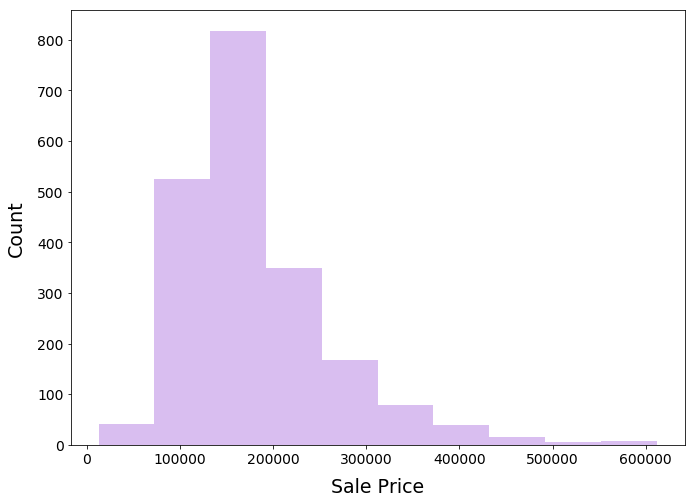

In [28]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(df.saleprice, kde=False, color='#A15EDB', bins=10)

plt.xlabel('Sale Price', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=19, labelpad=11)
plt.yticks(fontsize=14);

#plt.savefig("target_variable.png");

#looking at the distribution of my target variable

In [29]:
df.saleprice.describe()

#getting summary stats on my target variable

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

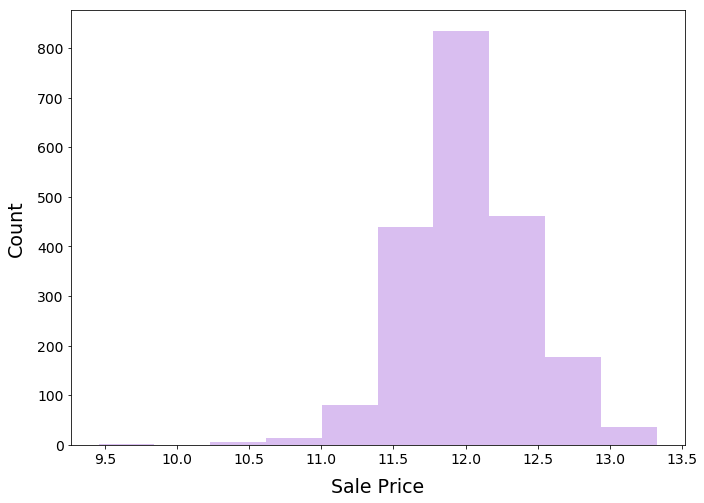

In [30]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(np.log(df.saleprice), kde=False, color='#A15EDB', bins=10)

plt.xlabel('Sale Price', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=19, labelpad=11)
plt.yticks(fontsize=14);

#plt.savefig("target_variable_log.png");

#looking at the distribution of my target after taking the log

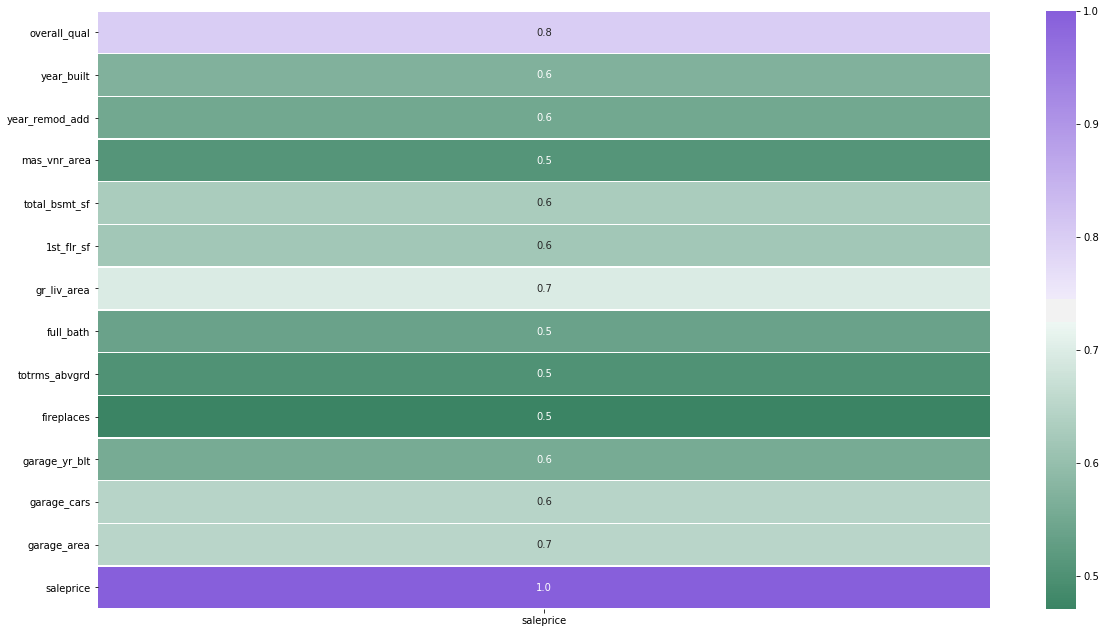

In [31]:
fig, ax = plt.subplots(figsize = (20, 11))

cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(df.corr()[['saleprice']][round(df.corr()['saleprice'].sort_values(ascending=False), 1) >= .5], annot=True, linewidths=.4, fmt=".1f", cmap=cmap, ax=ax);
#sns.set(font_scale=4)

#plt.savefig("heatmap.png");

#looking at a correlation heatmap of my features in relation to sale price with correlations being greater than or equal to .5

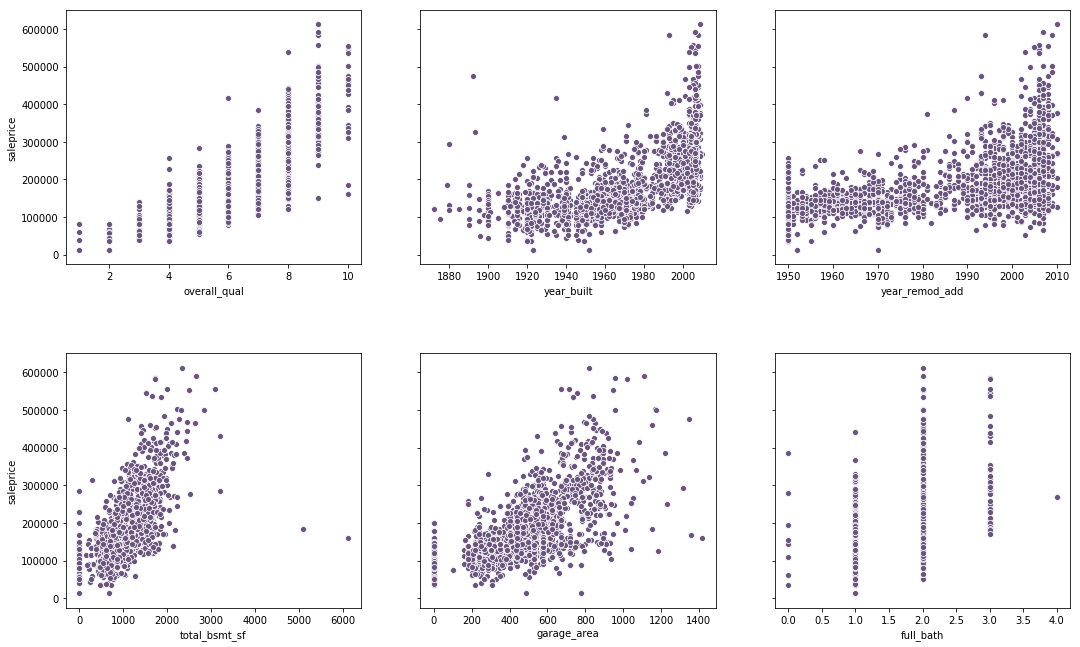

In [32]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (18,11), sharey=True)
fig.subplots_adjust(wspace=.2, hspace=.35)
#sns.set(font_scale=.5)

sns.scatterplot(x=df.overall_qual, y=df.saleprice, ax=ax[0, 0], color='#69547C', )
sns.scatterplot(x=df.year_built, y=df.saleprice, ax=ax[0, 1], color='#69547C')
sns.scatterplot(x=df.year_remod_add, y=df.saleprice, ax=ax[0, 2], color='#69547C')
sns.scatterplot(x=df.total_bsmt_sf, y=df.saleprice, ax=ax[1, 0], color='#69547C')
sns.scatterplot(x=df.garage_area, y=df.saleprice, ax=ax[1, 1], color='#69547C')
sns.scatterplot(x=df.full_bath, y=df.saleprice, ax=ax[1, 2], color='#69547C')

#plt.savefig("subplots.png");

#plotting some of the features from the correlation heatmap to see the linear relationship beyond numbers

<center> 
    <h1> FEATURE ENGINEERING & MORE EDA </h1> 
</center>

In [33]:
df['sale_price_bool'] = df.saleprice.map(lambda x: 0 if x <= 162500 else 1)
df_2['sale_price_bool'] = df.saleprice.map(lambda x: 0 if x <= 162500 else 1)

#engineering a feature that with take into account sale price and return boolean values
#(1 if greater than the median and 0 if otherwise)

In [34]:
df.saleprice = df.saleprice.map(np.log)

#applied a permanent log transformation to my target variable

In [35]:
df.dtypes.value_counts()

#looking at the counts of data types for my training data

object     42
int64      28
float64    12
dtype: int64

In [36]:
df.columns[df.dtypes == object]

#looking at column names for instances where data type is equal to "object"

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object')

In [37]:
to_dummy = ['ms_zoning', 'street', 'alley', 'land_contour', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
            'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 
            'mas_vnr_type', 'foundation', 'heating', 'central_air', 'electrical', 'functional', 'garage_type', 'utilities',
            'paved_drive', 'fence', 'misc_feature', 'sale_type', 'bsmt_exposure', 'lot_shape', 'garage_finish', 'pool_qc']

#took features from the list above and added them here to be dummied

In [38]:
to_map = ['bsmt_cond', 'bsmt_qual', 'bsmtfin_type_1', 'bsmtfin_type_2', 'exter_cond', 'exter_qual', 'fireplace_qu',
          'garage_cond', 'garage_qual', 'heating_qc', 'kitchen_qual']

#took features from the list above and added them here to be mapped

In [39]:
df = pd.get_dummies(df, columns=to_dummy, drop_first=True)
df.head(1)

#dummied all of the features in my 'to_dummy' list and displayed the head to confirm desired result

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod_add,mas_vnr_area,...,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,pool_qc_Fa,pool_qc_Gd,pool_qc_NA,pool_qc_TA
0,109,533352170,60,69.0,13517,6,8,1976,2005,289.0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
df_2 = pd.get_dummies(df_2, columns=to_dummy, drop_first=True)
df_2.head(1)

#dummied all of the features in my 'to_dummy' list and displayed the head to confirm desired result

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod_add,mas_vnr_area,...,bsmt_exposure_NA,bsmt_exposure_No,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,pool_qc_NA,pool_qc_TA
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,0,1,0,0,1,0,0,1,1,0


In [41]:
mapper_1 = {'Ex':5,
               'Gd':4,
               'TA':3,
               'Fa':2,
               'Po':1}

#created a variable that housed the dictionary that would be passed when mapping my features

In [42]:
df['exter_qual_scored'] = df.exter_qual.replace(mapper_1)
df['exter_cond_scored'] = df.exter_cond.replace(mapper_1)
df['heating_qc_scored'] = df.heating_qc.replace(mapper_1)
df['kitchen_qual_scored'] = df.kitchen_qual.replace(mapper_1)

print(df.exter_qual_scored.value_counts())
print(df.exter_cond_scored.value_counts())
print(df.heating_qc_scored.value_counts())
print(df.kitchen_qual_scored.value_counts())

#passed the 'mapper_1' variable in a replace function for all of the columns i wanted to score
#simultaneously created a new column with the old column name + '_scored'
#printed the new columns to confirm desired results

3    1247
4     697
5      81
2      26
Name: exter_qual_scored, dtype: int64
3    1778
4     215
2      49
5       7
1       2
Name: exter_cond_scored, dtype: int64
5    1065
3     597
4     319
2      67
1       3
Name: heating_qc_scored, dtype: int64
3    1047
4     806
5     151
2      47
Name: kitchen_qual_scored, dtype: int64


In [43]:
df_2['exter_qual_scored'] = df_2.exter_qual.replace(mapper_1)
df_2['exter_cond_scored'] = df_2.exter_cond.replace(mapper_1)
df_2['heating_qc_scored'] = df_2.heating_qc.replace(mapper_1)
df_2['kitchen_qual_scored'] = df_2.kitchen_qual.replace(mapper_1)

print(df_2.exter_qual_scored.value_counts())
print(df_2.exter_cond_scored.value_counts())
print(df_2.heating_qc_scored.value_counts())
print(df_2.kitchen_qual_scored.value_counts())

#passed the 'mapper_1' variable in a replace function for all of the columns i wanted to score
#simultaneously created a new column with the old column name + '_scored'
#printed the new columns to confirm desired results

3    552
4    292
5     26
2      9
Name: exter_qual_scored, dtype: int64
3    771
4     84
2     18
5      5
1      1
Name: exter_cond_scored, dtype: int64
5    430
3    267
4    157
2     25
Name: heating_qc_scored, dtype: int64
3    447
4    354
5     54
2     23
1      1
Name: kitchen_qual_scored, dtype: int64


In [44]:
mapper_2 = {'Ex':6,
               'Gd':5,
               'TA':4,
               'Fa':3,
               'Po':2,
               'NA':1}

#created a variable that housed the dictionary that would be passed when mapping my features

In [45]:
df['bsmt_qual_scored'] = df.bsmt_qual.replace(mapper_2)
df['bsmt_cond_scored'] = df.bsmt_cond.replace(mapper_2)
df['fireplace_qu_scored'] = df.fireplace_qu.replace(mapper_2)
df['garage_qual_scored'] = df.garage_qual.replace(mapper_2)
df['garage_cond_scored'] = df.garage_cond.replace(mapper_2)


print(df.bsmt_qual_scored.value_counts())
print(df.bsmt_cond_scored.value_counts())
print(df.fireplace_qu_scored.value_counts())
print(df.garage_qual_scored.value_counts())
print(df.garage_cond_scored.value_counts())

#passed the 'mapper_2' variable in a replace function for all of the columns i wanted to score
#simultaneously created a new column with the old column name + '_scored'
#printed the new columns to confirm desired results

4    887
5    864
6    184
3     60
1     55
2      1
Name: bsmt_qual_scored, dtype: int64
4    1834
5      89
3      65
1      55
2       5
6       3
Name: bsmt_cond_scored, dtype: int64
1    1000
5     523
4     407
3      59
6      31
2      31
Name: fireplace_qu_scored, dtype: int64
4    1832
1     114
3      82
5      18
6       3
2       2
Name: garage_qual_scored, dtype: int64
4    1868
1     114
3      47
5      12
2       8
6       2
Name: garage_cond_scored, dtype: int64


In [46]:
df_2['bsmt_qual_scored'] = df_2.bsmt_qual.replace(mapper_2)
df_2['bsmt_cond_scored'] = df_2.bsmt_cond.replace(mapper_2)
df_2['fireplace_qu_scored'] = df_2.fireplace_qu.replace(mapper_2)
df_2['garage_qual_scored'] = df_2.garage_qual.replace(mapper_2)
df_2['garage_cond_scored'] = df_2.garage_cond.replace(mapper_2)


print(df_2.bsmt_qual_scored.value_counts())
print(df_2.bsmt_cond_scored.value_counts())
print(df_2.fireplace_qu_scored.value_counts())
print(df_2.garage_qual_scored.value_counts())
print(df_2.garage_cond_scored.value_counts())

#passed the 'mapper_2' variable in a replace function for all of the columns i wanted to score
#simultaneously created a new column with the old column name + '_scored'
#printed the new columns to confirm desired results

4    396
5    355
6     74
3     28
1     25
2      1
Name: bsmt_qual_scored, dtype: int64
4    782
3     39
5     33
1     25
Name: bsmt_cond_scored, dtype: int64
1    422
5    221
4    193
3     16
2     15
6     12
Name: fireplace_qu_scored, dtype: int64
4    783
1     45
3     42
5      6
2      3
Name: garage_qual_scored, dtype: int64
4    797
1     45
3     27
2      6
5      3
6      1
Name: garage_cond_scored, dtype: int64


In [47]:
mapper_3 = {'GLQ':7,
               'ALQ':6,
               'BLQ':5,
               'Rec':4,
               'LwQ':3,
               'Unf':2,
               'NA':1}

#created a variable that housed the dictionary that would be passed when mapping my features

In [48]:
df['bsmtfin_type_1_scored'] = df.bsmtfin_type_1.replace(mapper_3)
df['bsmtfin_type_2_scored'] = df.bsmtfin_type_2.replace(mapper_3)

df_2['bsmtfin_type_1_scored'] = df_2.bsmtfin_type_1.replace(mapper_3)
df_2['bsmtfin_type_2_scored'] = df_2.bsmtfin_type_2.replace(mapper_3)

print(df.bsmtfin_type_1_scored.value_counts())
print(df.bsmtfin_type_2_scored.value_counts())

print(df_2.bsmtfin_type_1_scored.value_counts())
print(df_2.bsmtfin_type_2_scored.value_counts())

#passed the 'mapper_3' variable in a replace function for all of the columns i wanted to score
#simultaneously created a new column with the old column name + '_scored'
#printed the new columns to confirm desired results

7    615
2    603
6    293
5    200
4    183
3    102
1     55
Name: bsmtfin_type_1_scored, dtype: int64
2    1749
4      80
3      60
1      56
5      48
6      35
7      23
Name: bsmtfin_type_2_scored, dtype: int64
2    248
7    244
6    136
4    105
5     69
3     52
1     25
Name: bsmtfin_type_1_scored, dtype: int64
2    750
3     29
4     26
1     25
5     20
6     18
7     11
Name: bsmtfin_type_2_scored, dtype: int64


In [49]:
df.drop(columns=to_map, inplace=True)

#dropped the features in the 'to_map' list as they'd been replaced with the scored versions

In [50]:
df_2.drop(columns=to_map, inplace=True)

#dropped the features in the 'to_map' list as they'd been replaced with the scored versions

In [51]:
df.shape

#checking the shape of my training data now that i've engineered features

(2051, 226)

In [52]:
df_2.shape

#checking the shape of my test data now that i've engineered features

(879, 210)

In [53]:
df_columns_to_drop = set(df.columns[df.columns != 'saleprice']) - set(df_2.columns)
df_columns_to_drop

#created a variable that houses the difference of my test data from my training data with the exception of sale price

{'condition_2_Feedr',
 'condition_2_RRAe',
 'condition_2_RRAn',
 'condition_2_RRNn',
 'electrical_Mix',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_Stone',
 'functional_Sal',
 'functional_Sev',
 'heating_OthW',
 'heating_Wall',
 'misc_feature_Gar2',
 'misc_feature_TenC',
 'ms_zoning_C (all)',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'pool_qc_Fa',
 'pool_qc_Gd',
 'roof_matl_CompShg',
 'roof_matl_Membran',
 'utilities_NoSeWa'}

In [54]:
df_2_columns_to_drop = set(df_2.columns) - set(df.columns)
df_2_columns_to_drop

#created a variable that houses the difference of my training data from my test data

{'exterior_1st_PreCast',
 'exterior_2nd_Other',
 'exterior_2nd_PreCast',
 'heating_GasA',
 'mas_vnr_type_CBlock',
 'roof_matl_Metal',
 'roof_matl_Roll',
 'sale_type_VWD'}

In [55]:
df.drop(columns=df_columns_to_drop, inplace=True)

#dropped the columns from my training data that were not in my test data

In [56]:
df_2.drop(columns=df_2_columns_to_drop, inplace=True)

#dropped the columns from my test data that were not in my training data

In [57]:
df.shape

#confirming shape

(2051, 203)

In [58]:
df_2.shape

#confirming shape

(879, 202)

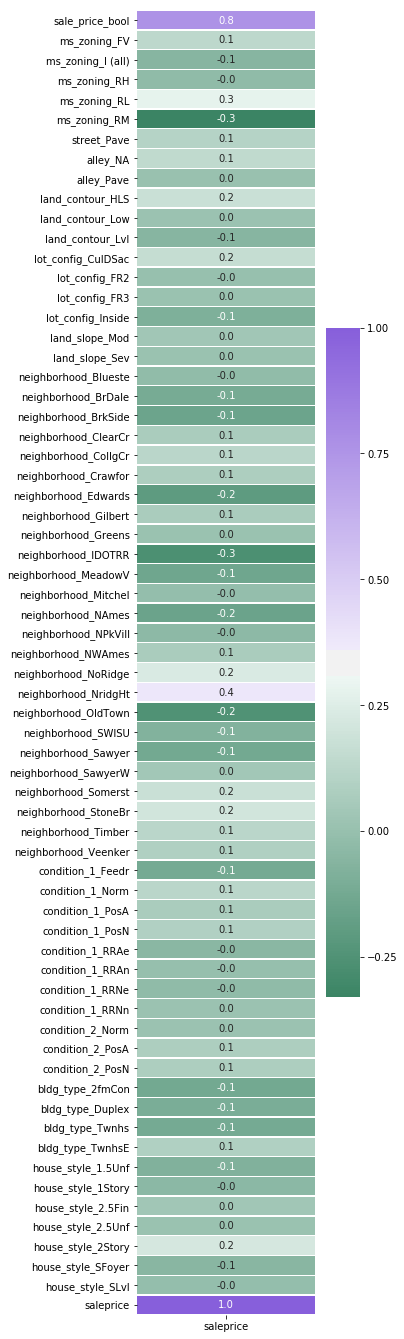

In [59]:
fig, ax = plt.subplots(figsize = (4, 24))

cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(df[df.columns[39:104]].join(df.saleprice).corr()[['saleprice']], annot=True, linewidths=.4, fmt=".1f", cmap=cmap, ax=ax);
#sns.set(font_scale=4)

#plt.savefig("heatmap_fe_1.png");

#created at a correlation heatmap of my new features in relation to sale price, looking at the first 65 features

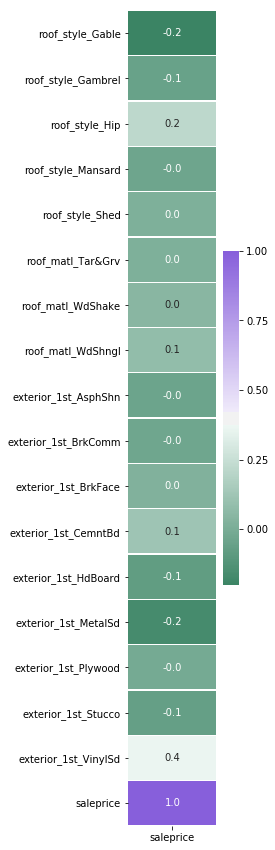

In [60]:
fig, ax = plt.subplots(figsize = (2, 15))

cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(df[df.columns[104:121]].join(df.saleprice).corr()[['saleprice']], annot=True, linewidths=.4, fmt=".1f", cmap=cmap, ax=ax);
#sns.set(font_scale=2.5)

#plt.savefig("heatmap_fe_2.png");

#created at a correlation heatmap of my new features in relation to sale price, looking at the next 17 features

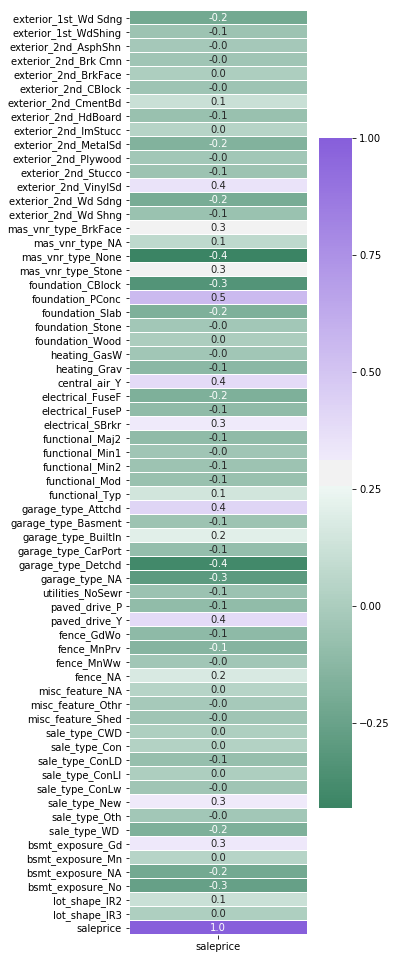

In [61]:
fig, ax = plt.subplots(figsize = (4, 17))

cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(df[df.columns[121:186]].join(df.saleprice).corr()[['saleprice']], annot=True, linewidths=.4, fmt=".1f", cmap=cmap, ax=ax);
#sns.set(font_scale=4)
#plt.savefig("heatmap_fe_3.png");

#created at a correlation heatmap of my new features in relation to sale price, looking at the next 65 features

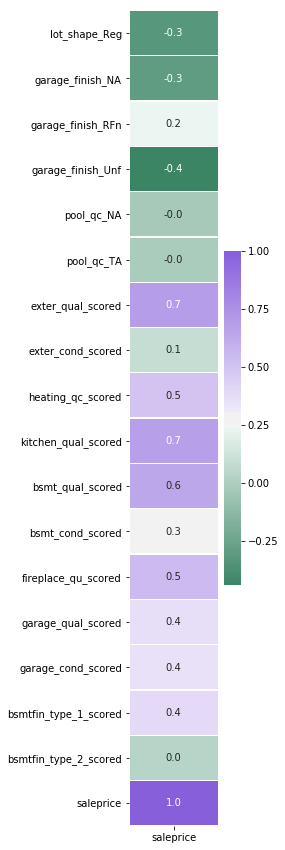

In [62]:
fig, ax = plt.subplots(figsize = (2, 15))

cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(df[df.columns[186:]].join(df.saleprice).corr()[['saleprice']], annot=True, linewidths=.4, fmt=".1f", cmap=cmap, ax=ax);
#sns.set(font_scale=4)

#plt.savefig("heatmap_fe_4.png");

#created at a correlation heatmap of my new features in relation to sale price, looking at the last 17 features

<center> 
    <h1> MODELING </h1> 
</center>

In [63]:
numerical_columns = df._get_numeric_data().columns
features = [col for col in numerical_columns if col != 'saleprice']
X = df[features]
y = df.saleprice

# created my X and y variables

In [64]:
p = PolynomialFeatures()

#instantiated Polynomial Features and set it equal to p

In [65]:
features_poly = p.fit_transform(df[features])

#fitting and transforming my features and setting them equal to a variable, features_poly

In [66]:
poly_df = pd.DataFrame(features_poly, columns=p.get_feature_names())

#creating a data frame of my fit/transformed features

In [67]:
numerical_columns_2 = df_2._get_numeric_data().columns
features_2 = [col for col in numerical_columns_2 if col != 'saleprice']

#creating features for my test data

In [68]:
features_poly_df_2 = p.transform(df_2[features_2])

#transforming my features and setting them equal to a variable, features_poly_df_2

In [73]:
poly_df_2 = pd.DataFrame(features_poly_df_2, columns=p.get_feature_names())

#creating a data frame of my transformed features

In [74]:
X_train, X_test, y_train, y_test = train_test_split(poly_df, df.saleprice, random_state=28)

#instantiating train test split while creating my X and y train and test variables

In [75]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

#instantiating the standard scaler and setting it equal to ss
#scaling my Xs

In [76]:
scaled_test_data = ss.transform(poly_df_2)

#scaling my test data and setting it equal to a variable, scaled_test_data

In [77]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

#taking the log of my ys

In [78]:
print(X_train.shape)
print(X_test.shape)

#printing the shape of my Xs

(1538, 20706)
(513, 20706)


In [79]:
lr = LinearRegression()
lasso = LassoCV()
ridge = RidgeCV()

#instantiating 3 models

In [80]:
lr.fit(X_train_sc, y_train_log)

#fitting my training data to the linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
lr.score(X_train_sc, y_train_log)

#scoring my training data

1.0

In [82]:
lr.score(X_test_sc, y_test_log)

#scoring my testing data

-324151780.462544

In [83]:
ridge.fit(X_train_sc, y_train_log)

#fitting my training data to the ridge model

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [84]:
ridge.score(X_train_sc, y_train_log)

#scoring my training data

0.999760746390101

In [85]:
ridge.score(X_test_sc, y_test_log)

#scoring my testing data

0.7903377471339575

In [86]:
lasso.fit(X_train_sc, y_train_log)

#fitting my training data to the lasso model

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [87]:
lasso.score(X_train_sc, y_train_log)

#scoring my training data

0.9409307241774675

In [88]:
lasso.score(X_test_sc, y_test_log)

#scoring my testing data

0.8624788310654063

In [100]:
y_pred = lasso.predict(scaled_test_data)

#creating a variable, y_pred, and setting it equal to the lasso prediction of my scaled test data

In [90]:
y_pred = np.exp(y_pred)
y_pred_2 = np.exp(y_pred)

#reversing the log transform I did earlier

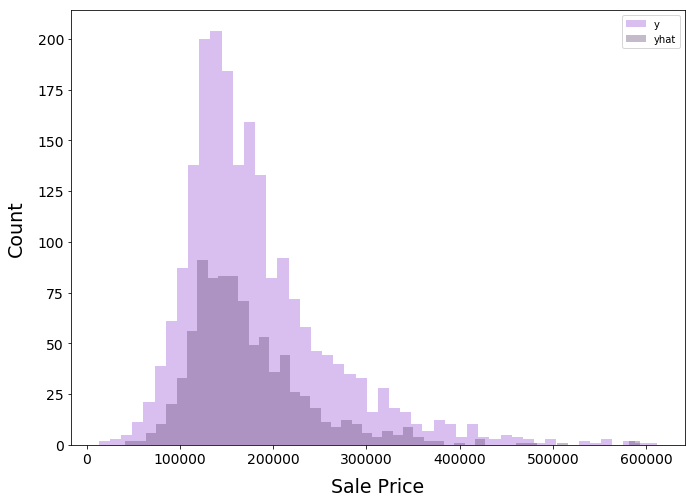

In [91]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(np.exp(df.saleprice), kde=False, color='#A15EDB', bins=50, label='y')
sns.distplot(y_pred_2, kde=False, color='#69547C', bins=50, label='yhat')

plt.xlabel('Sale Price', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=19, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right');


#plt.savefig("y_vs_yhat.png");

#looking at the distribution of my target variable versus my predictions

In [92]:
my_ids = df_2['id']

#creating a variable, my_ids, from my test data

In [93]:
pred_df = pd.DataFrame()

#creating an empty data frame to house my ids and predictions

In [94]:
pred_df['id'] = my_ids

#storing my ids into my data frame

In [95]:
pred_df['saleprice'] = y_pred_2

#storing my predicted sale prices into my data frame

In [96]:
pred_df.set_index('id', inplace=True)

#setting the index of my data frame to my ids

In [97]:
pred_df.to_csv('./datasets/britt_final_submission.csv')

#exporting my data frame of predictions to a csv named, "britt_final_submission.csv"